In [1]:
import simulate as sim
import helpers
import localizer

from __future__ import division, print_function
%load_ext autoreload
%autoreload 2

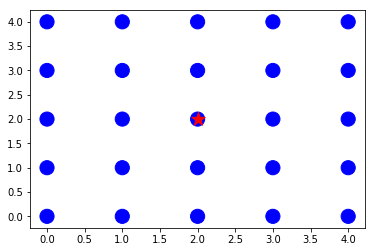

In [2]:
# This code defines a 5x5 robot world as well as some other parameters
# which we will discuss later. It then creates a simulation and shows 
# the initial beliefs. 
R = 'r'
G = 'g'
grid = [
    [R,G,G,G,R],
    [G,G,R,G,R],
    [G,R,G,G,G],
    [R,R,G,R,G],
    [R,G,R,G,R],
]
blur = 0.05
p_hit = 200.0
simulation = sim.Simulation(grid, blur, p_hit)
simulation.show_beliefs()

Run the code below multiple times by repeatedly pressing Ctrl + Enter.

After each run observe how the state has changed. 

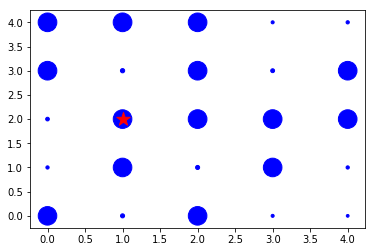

In [3]:
simulation.run(1)
simulation.show_beliefs()

The red star shows the robot's true position. The blue circles indicate the strength of the robot's belief that it is at any particular location.

Ideally we want the biggest blue circle to be at the same position as the red star.

In [4]:
def show_rounded_beliefs(beliefs):
    for row in beliefs:
        for belief in row:
            print("{:0.3f}".format(belief), end="  ")
        print()
        
# https://pyformat.info/

In [5]:
show_rounded_beliefs(simulation.beliefs)

0.040  0.040  0.040  0.040  0.040  
0.040  0.040  0.040  0.040  0.040  
0.040  0.040  0.040  0.040  0.040  
0.040  0.040  0.040  0.040  0.040  
0.040  0.040  0.040  0.040  0.040  


_____

In [134]:
reload(localizer)
def test_sense():
    R = 'r'
    _ = 'g'

    simple_grid = [
        [_,_,_],
        [_,R,_],
        [_,_,_]
    ]

    p = 1.0 / 9
    initial_beliefs = [
        [p,p,p],
        [p,p,p],
        [p,p,p]
    ]

    observation = R

    expected_beliefs_after = [
        [1/11, 1/11, 1/11],
        [1/11, 3/11, 1/11],
        [1/11, 1/11, 1/11]
    ]

    p_hit  = 3.0
    p_miss = 1.0
    beliefs_after_sensing = localizer.sense(
        observation, simple_grid, initial_beliefs, p_hit, p_miss)

    if helpers.close_enough(beliefs_after_sensing, expected_beliefs_after):
        print("Tests pass! Your sense function is working as expected")
        return
    
    elif not isinstance(beliefs_after_sensing, list):
        print("Your sense function doesn't return a list!")
        return
        
    elif len(beliefs_after_sensing) != len(expected_beliefs_after):
        print("Dimensionality error! Incorrect height")
        return
              
    elif len(beliefs_after_sensing[0] ) != len(expected_beliefs_after[0]):
        print("Dimensionality Error! Incorrect width")
        return
    
    elif beliefs_after_sensing == initial_beliefs:
        print("Your code returns the initial beliefs.")
        return
        
    total_probability = 0.0
    for row in beliefs_after_sensing:
        for p in row:
            total_probability += p
    if abs(total_probability-1.0) > 0.001:
        
        print("Your beliefs appear to not be normalized")
        return
    
    print("Something isn't quite right with your sense function")

test_sense()

Tests pass! Your sense function is working as expected


In [135]:
R = 'r'
_ = 'g'

simple_grid = [
    [_,_,_],
    [_,R,_],
    [_,_,_]
]

p = 1.0 / 9
initial_beliefs = [
    [p,p,p],
    [p,p,p],
    [p,p,p]
]

observation = R

expected_beliefs_after = [
    [1/11, 1/11, 1/11],
    [1/11, 3/11, 1/11],
    [1/11, 1/11, 1/11]
]

p_hit  = 3.0
p_miss = 1.0
beliefs_after_sensing = localizer.sense(
    observation, simple_grid, initial_beliefs, p_hit, p_miss)
print(beliefs_after_sensing)

[[0.09090909090909091, 0.09090909090909091, 0.09090909090909091], [0.09090909090909091, 0.27272727272727276, 0.09090909090909091], [0.09090909090909091, 0.09090909090909091, 0.09090909090909091]]


## Integration Testing

In [267]:
from simulate import Simulation
import simulate as sim
import helpers
reload(localizer)
reload(sim)
reload(helpers)

R = 'r'
G = 'g'
grid = [
    [R,G,G,G,R,R,R],
    [G,G,R,G,R,G,R],
    [G,R,G,G,G,G,R],
    [R,R,G,R,G,G,G],
#     [R,G,R,G,R,R,R],
#     [G,R,R,R,G,R,G],
#     [R,R,R,G,R,G,G],
]

# Use small value for blur. This parameter is used to represent
# the uncertainty in MOTION, not in sensing. We want this test
# to focus on sensing functionality
blur = 0.1
p_hit = 100.0
simulation = sim.Simulation(grid, blur, p_hit)

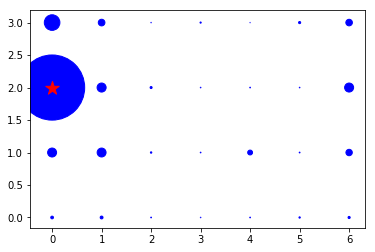

In [280]:
# Run this cell about 15-25 times and observe the results
simulation.run(1)
simulation.show_beliefs()

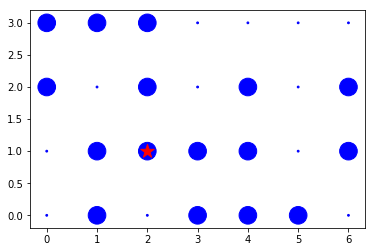

In [118]:
from simulate import Simulation
import simulate as sim
import helpers
reload(localizer)
reload(sim)
reload(helpers)

R = 'r'
G = 'g'

grid = [ 
    [R,G,G,G,R,R,R],
    [G,G,R,G,R,G,R],
    [G,R,G,G,G,G,R],
    [R,R,G,R,G,G,G],
#     [R,R,G,R,G,G,G],
#     [R,R,G,R,G,G,G],
#     [R,R,G,R,G,G,G]
]

blur = 0.001
p_hit = 100.0
simulation = sim.Simulation(grid, blur, p_hit)

simulation.run(1)
simulation.show_beliefs()

In [ ]:
simulation.run(1)

In [106]:
def test_robot_works_in_rectangle_world():
    from simulate import Simulation
    import simulate as sim
    import helpers
    reload(localizer)
    reload(sim)
    reload(helpers)

    R = 'r'
    G = 'g'

    grid = [ 
        [R,G,G,G,R,R,R],
        [G,G,R,G,R,G,R],
        [G,R,G,G,G,G,R],
        [R,R,G,R,G,G,G],
#         [R,R,G,R,G,G,G],
#         [R,R,G,R,G,G,G],
#         [R,R,G,R,G,G,G]
    ]

    blur = 0.001
    p_hit = 100.0
    
#     print(len(grid))
#     print(len(grid[0]))
    
#     if len(grid) == len(grid[0]):
    for i in range(1000):
        simulation = sim.Simulation(grid, blur, p_hit)
        simulation.run(1)
#     else:
#         print('not a square.')
    
test_robot_works_in_rectangle_world()